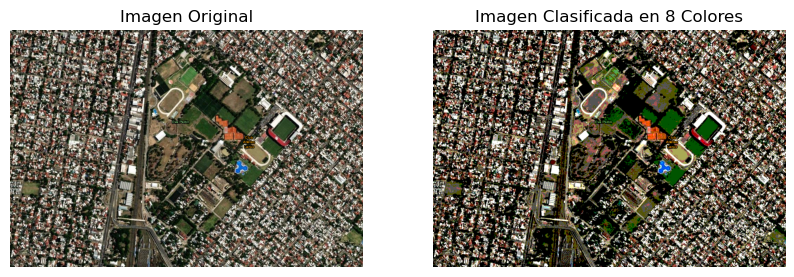

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen RGB
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir los umbrales para cada canal de color (puedes ajustarlos según tu imagen)
r_thresholds = [64, 128, 192]
g_thresholds = [64, 128, 192]
b_thresholds = [64, 128, 192]

# Crear imágenes de clasificación para cada canal
r_classified = np.digitize(image_rgb[:, :, 0], bins=r_thresholds) * (255 // len(r_thresholds))
g_classified = np.digitize(image_rgb[:, :, 1], bins=g_thresholds) * (255 // len(g_thresholds))
b_classified = np.digitize(image_rgb[:, :, 2], bins=b_thresholds) * (255 // len(b_thresholds))

# Combinar los canales clasificados en una sola imagen
classified_image = cv2.merge((r_classified, g_classified, b_classified))

# Mostrar la imagen original y la imagen clasificada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Clasificada en 8 Colores")
plt.imshow(classified_image)
plt.axis("off")

plt.show()


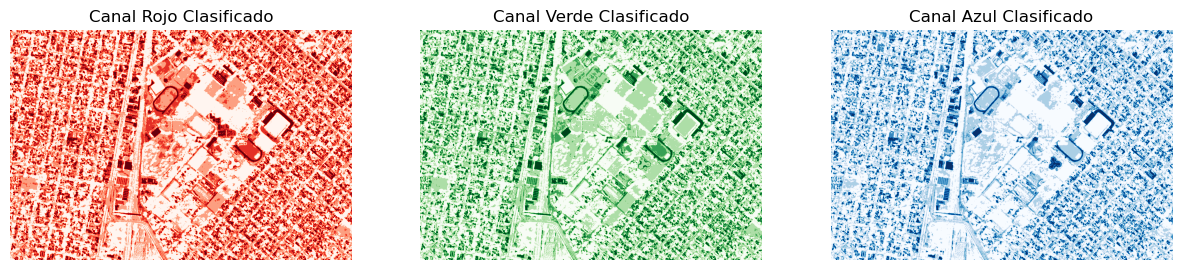

In [2]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Canal Rojo Clasificado")
plt.imshow(r_classified, cmap='Reds')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Canal Verde Clasificado")
plt.imshow(g_classified, cmap='Greens')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Canal Azul Clasificado")
plt.imshow(b_classified, cmap='Blues')
plt.axis("off")
plt.show()

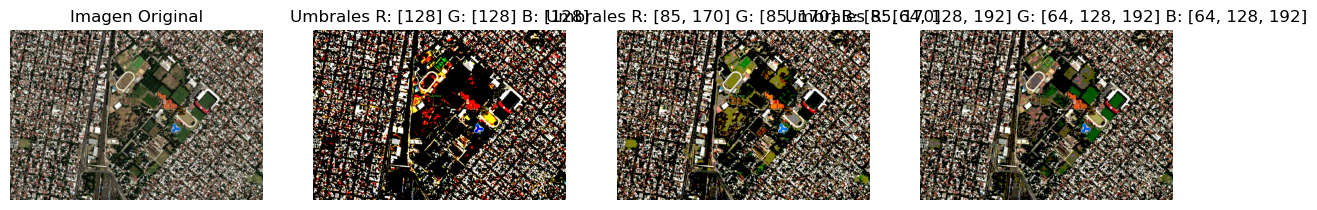

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para clasificar la imagen en función de umbrales personalizados
def classify_image(image_rgb, r_thresholds, g_thresholds, b_thresholds):
    # Clasificación por bandas para cada canal
    r_classified = np.digitize(image_rgb[:, :, 0], bins=r_thresholds) * (255 // (len(r_thresholds) + 1))
    g_classified = np.digitize(image_rgb[:, :, 1], bins=g_thresholds) * (255 // (len(g_thresholds) + 1))
    b_classified = np.digitize(image_rgb[:, :, 2], bins=b_thresholds) * (255 // (len(b_thresholds) + 1))

    # Combinar canales clasificados
    classified_image = cv2.merge((r_classified, g_classified, b_classified))
    return classified_image

# Cargar la imagen RGB
image_path = 'lanus.png'  # Cambia esta ruta si es necesario
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir conjuntos de umbrales para experimentar
threshold_sets = [
    ([128], [128], [128]),               # 4 colores
    ([85, 170], [85, 170], [85, 170]),   # 8 colores
    ([64, 128, 192], [64, 128, 192], [64, 128, 192]),  # 16 colores
]

# Visualizar la imagen original y las clasificadas con diferentes umbrales
plt.figure(figsize=(15, 10))

# Mostrar imagen original
plt.subplot(1, len(threshold_sets) + 1, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis("off")

# Aplicar y mostrar clasificación con cada conjunto de umbrales
for i, (r_thresh, g_thresh, b_thresh) in enumerate(threshold_sets, start=2):
    classified_img = classify_image(image_rgb, r_thresh, g_thresh, b_thresh)

    # Ajuste para mejorar el contraste y la visualización de los colores
    # Escalamos cada canal de la imagen clasificada para mejorar la visualización
    classified_img = cv2.convertScaleAbs(classified_img, alpha=(255.0 / classified_img.max()))

    plt.subplot(1, len(threshold_sets) + 1, i)
    plt.imshow(classified_img)
    plt.title(f"Umbrales R: {r_thresh} G: {g_thresh} B: {b_thresh}")
    plt.axis("off")

plt.show()
